#Import


In [ ]:
from google.colab import drive
drive.mount('/content/Mydrive')

Mounted at /content/Mydrive


#Libraries 

In [ ]:
!pip install tsfresh

     |████████████████████████████████| 94 kB 3.0 MB/s 
     |████████████████████████████████| 112 kB 13.1 MB/s 
     |████████████████████████████████| 1.1 MB 13.4 MB/s 
     |████████████████████████████████| 766 kB 21.9 MB/s 
     |████████████████████████████████| 118 kB 44.2 MB/s 
     |████████████████████████████████| 1.0 MB 43.9 MB/s 
     |████████████████████████████████| 722 kB 40.8 MB/s 
     |████████████████████████████████| 722 kB 53.4 MB/s 
     |████████████████████████████████| 715 kB 59.9 MB/s 
     |████████████████████████████████| 705 kB 58.9 MB/s 
     |████████████████████████████████| 699 kB 51.4 MB/s 
     |████████████████████████████████| 696 kB 56.8 MB/s 
     |████████████████████████████████| 684 kB 39.9 MB/s 
     |████████████████████████████████| 679 kB 45.9 MB/s 
     |████████████████████████████████| 675 kB 44.8 MB/s 
     |████████████████████████████████| 675 kB 37.5 MB/s 
     |████████████████████████████████| 672 kB 43.0 MB/s 
     |██████████

In [ ]:
from tsfresh.feature_extraction import MinimalFCParameters

In [ ]:
import pandas as pd
from tsfresh.feature_extraction import extract_features

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import sklearn
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

#Load DATA

#Viewing Data

In [ ]:
var = {
    'frame': 0,
    'SVtotal': 1,
    'Ax': 2,
    'Az': 3,
    'Ay': 4,
    'id': 5
#SVtotal, Ax, Az, Ay. 

}

In [ ]:
ADL_T_0 = pd.read_csv('/content/Mydrive/MyDrive/projetos/Assignment 2 – Classification with scikit learn/DatasetDesafio/ADL/Test/0.csv', names= var, )

In [ ]:
ADL_T_0['id'] = 1
ADL_T_0

,frame,SVtotal,Ax,Az,Ay,id
0,-187.0,1.164722,0.508362,0.598458,0.858435,1
1,-177.0,0.867221,0.402072,0.451191,0.622602,1
2,-153.0,1.190304,0.512278,0.623657,0.872781,1
3,-146.0,1.561568,0.633153,0.831689,1.156918,1
4,-121.0,0.793837,0.363163,0.418250,0.569564,1
...,...,...,...,...,...,...
136,2355.0,0.877136,0.335553,0.211139,0.798875,1
137,2380.0,1.428501,0.578708,0.364122,1.261972,1
138,2393.0,1.893197,0.694052,0.660996,1.619841,1
139,2403.0,0.937865,0.256065,0.070730,0.950657,1


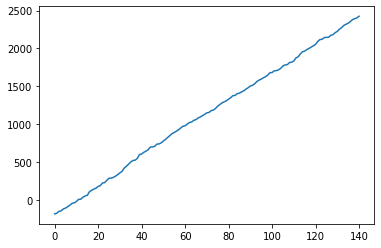

In [ ]:
ADL_T_0['frame'].plot()
plt.show()

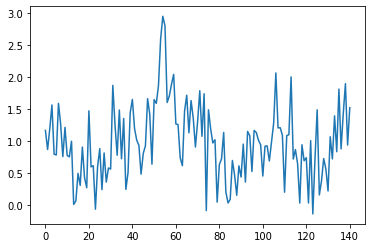

In [ ]:
ADL_T_0['SVtotal'].plot()
plt.show()

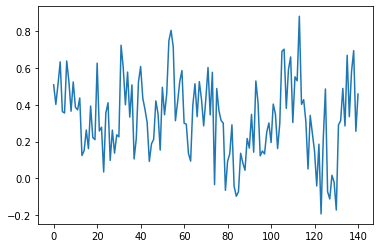

In [ ]:
ADL_T_0['Ax'].plot()
plt.show()

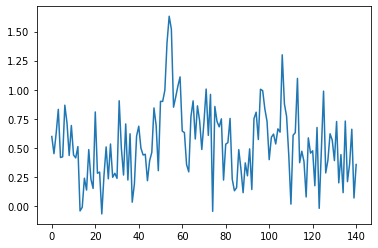

In [ ]:
ADL_T_0['Az'].plot()
plt.show()

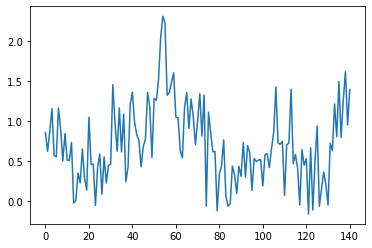

In [ ]:
ADL_T_0['Ay'].plot()
plt.show()

In [ ]:
adl_train = pd.read_csv('/content/Mydrive/MyDrive/projetos/Assignment 2 – Classification with scikit learn/DatasetDesafio/Fall/Train/fall-01-acc.csv', names=var)
adl_train

,frame,SVtotal,Ax,Az,Ay,id
0,-2,1.024924,0.128718,0.995601,0.206588,NaN
1,30,1.003218,0.166793,0.974967,0.167530,NaN
2,61,1.022040,0.175391,0.991916,0.172934,NaN
3,65,1.028459,0.152300,1.002479,0.171952,NaN
4,94,1.006250,0.139035,0.979880,0.181778,NaN
...,...,...,...,...,...,...
188,5272,1.094388,0.064113,-0.351519,1.034413,NaN
189,5275,1.075617,0.094328,-0.346851,1.013779,NaN
190,5306,1.059123,0.147387,-0.293546,1.006901,NaN
191,5310,1.042477,0.182515,-0.286668,0.985529,NaN


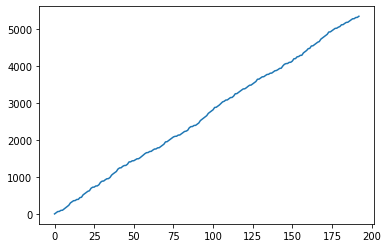

In [ ]:
adl_train['frame'].plot()
plt.show()

# Feature extraction



In [ ]:
df_fc_p = MinimalFCParameters()

data_path_ADL_test = Path('/content/Mydrive/MyDrive/projetos/Assignment 2 – Classification with scikit learn/DatasetDesafio/ADL/Test', '')
data_path_ADL_train = Path('/content/Mydrive/MyDrive/projetos/Assignment 2 – Classification with scikit learn/DatasetDesafio/ADL/Train', '')
data_path_FALL_test = Path('/content/Mydrive/MyDrive/projetos/Assignment 2 – Classification with scikit learn/DatasetDesafio/Fall/Test', '')
data_path_FALL_train = Path('/content/Mydrive/MyDrive/projetos/Assignment 2 – Classification with scikit learn/DatasetDesafio/Fall/Train','')

In [ ]:
len(df_ADL_train)


34

In [ ]:
df_ADL_test = pd.DataFrame()
df_ADL_train = pd.DataFrame()
df_FALL_test = pd.DataFrame()
df_FALL_train = pd.DataFrame()

# ADL/test
i = 0
a = 0
for i in data_path_ADL_test.iterdir():
  ADL_T = pd.read_csv(i, names= var)
  ADL_T['id'] = a
  extracted_features = extract_features(ADL_T, column_id='id', default_fc_parameters= df_fc_p)
  df_ADL_test = df_ADL_test.append(extracted_features)
  a+=1

# ADL/train
i = 0
a = 0
for i in data_path_ADL_train.iterdir():
  ADL_T = pd.read_csv(i, names= var)
  ADL_T['id'] = a
  extracted_features = extract_features(ADL_T, column_id='id', default_fc_parameters= df_fc_p)
  df_ADL_train = df_ADL_train.append(extracted_features)
  a+=1

# FALL/test
i = 0
a = 0
for i in data_path_FALL_test.iterdir():
  FALL_T = pd.read_csv(i, names= var)
  FALL_T['id'] = a
  extracted_features = extract_features(FALL_T, column_id='id', default_fc_parameters= df_fc_p)
  df_FALL_test = df_FALL_test.append(extracted_features)
  a+=1

# FALL/train
i = 0
a = 0
for i in data_path_FALL_train.iterdir():
  FALL_T = pd.read_csv(i, names= var)
  FALL_T['id'] = a
  extracted_features = extract_features(FALL_T, column_id='id', default_fc_parameters= df_fc_p)
  df_FALL_train = df_FALL_train.append(extracted_features)
  a+=1


Feature Extraction: 100%|██████████| 5/5 [00:00<00:00, 704.33it/s]


In [ ]:
# df_ADL_test  / df_ADL_train  / df_FALL_test  / df_FALL_train

df_ADL_test.columns

Index(['frame__sum_values', 'frame__median', 'frame__mean', 'frame__length',
       'frame__standard_deviation', 'frame__variance',
       'frame__root_mean_square', 'frame__maximum', 'frame__minimum',
       'SVtotal__sum_values', 'SVtotal__median', 'SVtotal__mean',
       'SVtotal__length', 'SVtotal__standard_deviation', 'SVtotal__variance',
       'SVtotal__root_mean_square', 'SVtotal__maximum', 'SVtotal__minimum',
       'Ax__sum_values', 'Ax__median', 'Ax__mean', 'Ax__length',
       'Ax__standard_deviation', 'Ax__variance', 'Ax__root_mean_square',
       'Ax__maximum', 'Ax__minimum', 'Az__sum_values', 'Az__median',
       'Az__mean', 'Az__length', 'Az__standard_deviation', 'Az__variance',
       'Az__root_mean_square', 'Az__maximum', 'Az__minimum', 'Ay__sum_values',
       'Ay__median', 'Ay__mean', 'Ay__length', 'Ay__standard_deviation',
       'Ay__variance', 'Ay__root_mean_square', 'Ay__maximum', 'Ay__minimum'],
      dtype='object')

In [ ]:
# ADL = 0 e FALL = 1

df_ADL_train.insert(0, 'classe', 0)
df_FALL_train.insert(0, 'classe', 1)
df_ADL_test.insert(0, 'classe', 0)
df_FALL_test.insert(0, 'classe', 1)

In [ ]:
frames = [df_ADL_train, df_FALL_train]
df_trein = pd.concat(frames)
DF = sklearn.utils.shuffle(df_trein)
DF

,classe,frame__sum_values,frame__median,frame__mean,frame__length,frame__standard_deviation,frame__variance,frame__root_mean_square,frame__maximum,frame__minimum,SVtotal__sum_values,SVtotal__median,SVtotal__mean,SVtotal__length,SVtotal__standard_deviation,SVtotal__variance,SVtotal__root_mean_square,SVtotal__maximum,SVtotal__minimum,Ax__sum_values,Ax__median,Ax__mean,Ax__length,Ax__standard_deviation,Ax__variance,Ax__root_mean_square,Ax__maximum,Ax__minimum,Az__sum_values,Az__median,Az__mean,Az__length,Az__standard_deviation,Az__variance,Az__root_mean_square,Az__maximum,Az__minimum,Ay__sum_values,Ay__median,Ay__mean,Ay__length,Ay__standard_deviation,Ay__variance,Ay__root_mean_square,Ay__maximum,Ay__minimum
7,1,175347.0,1514.0,1524.756522,115.0,891.136525,7.941243e+05,1766.070994,3024.0,-27.0,127.073292,1.048563,1.104985,115.0,0.475704,0.226294,1.203032,5.301679,0.283273,-40.946638,-0.691246,-0.356058,115.0,0.571363,0.326455,0.673225,1.083788,-1.009111,23.336562,0.114962,0.202927,115.0,0.452376,0.204644,0.495806,2.811903,-0.616816,81.722062,0.644574,0.710627,115.0,0.493194,0.243240,0.865003,4.361926,0.042742
0,0,644115.0,2558.0,2586.807229,249.0,1518.383212,2.305488e+06,2999.509829,5210.0,0.0,255.976527,0.987828,1.028018,249.0,0.156265,0.024419,1.039827,1.474426,0.697416,8.536916,0.000983,0.034285,249.0,0.129930,0.016882,0.134377,0.388365,-0.320322,220.785630,0.893658,0.886689,249.0,0.203456,0.041395,0.909732,1.464292,0.493010,-88.236579,-0.229187,-0.354364,249.0,0.331658,0.109997,0.485356,0.126999,-1.070032
28,0,1156006.0,3339.0,3370.279883,343.0,2014.144095,4.056776e+06,3926.265774,6815.0,-102.0,363.864954,1.031385,1.060831,343.0,0.263319,0.069337,1.093023,2.598847,0.234420,111.967157,0.115945,0.326435,343.0,0.429953,0.184859,0.539832,1.574342,-0.475078,230.861023,0.658330,0.673064,343.0,0.380375,0.144685,0.773111,2.164136,-0.421282,134.717609,0.455181,0.392763,343.0,0.388995,0.151317,0.552793,1.695690,-0.920433
30,0,2504017.0,5003.0,4958.449505,505.0,2956.578091,8.741354e+06,5773.004027,10030.0,-136.0,530.216126,1.039988,1.049933,505.0,0.197432,0.038979,1.068334,2.773198,0.304548,62.003365,0.079343,0.122779,505.0,0.346471,0.120042,0.367583,1.270724,-0.610920,287.612489,0.603796,0.569530,505.0,0.390892,0.152797,0.690768,2.298259,-0.159670,-129.656576,-0.184480,-0.256746,505.0,0.680546,0.463143,0.727366,1.397723,-1.497946
1,1,235602.0,1760.0,1812.323077,130.0,1084.177407,1.175441e+06,2111.860693,3666.0,-6.0,145.361559,1.028880,1.118166,130.0,0.532280,0.283322,1.238393,6.263861,0.347286,44.317631,0.360976,0.340905,130.0,0.257882,0.066503,0.427457,0.959245,-1.525458,41.986701,0.842932,0.322975,130.0,0.751174,0.564263,0.817665,1.469942,-2.013064,70.640750,0.269842,0.543390,130.0,0.622133,0.387049,0.826028,6.012909,-0.155494
23,0,306763.0,2033.0,873.968661,351.0,2426.424407,5.887535e+06,2579.022416,4037.0,-2187.0,380.803334,1.067653,1.084910,351.0,0.167840,0.028170,1.097816,2.649122,0.753432,-80.403191,-0.231889,-0.229069,351.0,0.120054,0.014413,0.258622,0.145668,-0.937629,331.638047,0.990688,0.944838,351.0,0.198876,0.039552,0.965541,2.294574,0.499152,83.110204,0.162126,0.236781,351.0,0.387271,0.149979,0.453921,1.072734,-0.398191
13,1,181460.0,1162.0,1163.205128,156.0,648.488496,4.205373e+05,1331.759550,2250.0,-8.0,173.598122,1.056649,1.112808,156.0,0.776569,0.603059,1.356983,8.360396,0.109709,-47.015555,0.064728,-0.301382,156.0,0.750772,0.563659,0.809006,0.366994,-6.504446,78.430167,0.592620,0.502757,156.0,0.575671,0.331397,0.764305,4.135441,-2.372935,35.838441,0.007369,0.229734,156.0,0.741601,0.549972,0.776370,5.239126,-0.717039
3,1,187094.0,1633.0,1599.094017,117.0,907.939011,8.243532e+05,1838.873275,3197.0,-29.0,136.455766,1.079454,1.166289,117.0,0.684675,0.468780,1.352408,5.787127,0.366596,32.920911,0.297722,0.281375,117.0,0.299682,0.089809,0.411073,0.975949,-0.991179,-10.142209,-0.255963,-0.086686,117.0,0.761191,0.579412,0.766111,0.917486,-2.900827,87.962684,0.662506,0.751818,117.0,0.712650,0.507871,1.035906,5.786424,0.192095

#Train

In [ ]:
variaveis = [
       'frame__sum_values', 'frame__median', 'frame__mean', 'frame__length',
       'frame__standard_deviation', 'frame__variance',
       'frame__root_mean_square', 'frame__maximum', 'frame__minimum',
       'SVtotal__sum_values', 'SVtotal__median', 'SVtotal__mean',
       'SVtotal__length', 'SVtotal__standard_deviation', 'SVtotal__variance',
       'SVtotal__root_mean_square', 'SVtotal__maximum', 'SVtotal__minimum',
       'Ax__sum_values', 'Ax__median', 'Ax__mean', 'Ax__length',
       'Ax__standard_deviation', 'Ax__variance', 'Ax__root_mean_square',
       'Ax__maximum', 'Ax__minimum', 'Az__sum_values', 'Az__median',
       'Az__mean', 'Az__length', 'Az__standard_deviation', 'Az__variance',
       'Az__root_mean_square', 'Az__maximum', 'Az__minimum', 'Ay__sum_values',
       'Ay__median', 'Ay__mean', 'Ay__length', 'Ay__standard_deviation',
       'Ay__variance', 'Ay__root_mean_square', 'Ay__maximum', 'Ay__minimum'
       ]
X = DF[variaveis]
Y = DF['classe']

X_treino, X_valid, y_treino, y_valid = train_test_split(X, Y, test_size=0.3)

NameError: ignored

In [ ]:
modelo = RandomForestClassifier(n_estimators=100 ,n_jobs=-1, random_state=0)

In [ ]:
modelo.fit(X_treino, y_treino)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
prev = modelo.predict(X_valid)

In [ ]:
modelo.score(X_valid, y_valid)

0.9444444444444444

In [ ]:
scores = cross_val_score(modelo, X_treino, y_treino, cv=10, scoring='accuracy' )
scores.mean()

0.975

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_treino, y_treino)
scores02 = cross_val_score(clf, X_treino, y_treino, cv=10, scoring='accuracy' )
scores02.mean()

0.975

In [ ]:
from sklearn import svm
clfv = svm.SVC()
clfv.fit(X_treino, y_treino)
clfv.score(X_valid, y_valid)


0.8333333333333334

In [ ]:
scores = cross_val_score(clfv, X_treino, y_treino, cv=10, scoring='accuracy' )
scores.mean()

0.875

In [ ]:
frames_test = [df_ADL_test, df_FALL_test]
df_test = pd.concat(frames_test)
DF_t = sklearn.utils.shuffle(df_test)
DF_t

,classe,frame__sum_values,frame__median,frame__mean,frame__length,frame__standard_deviation,frame__variance,frame__root_mean_square,frame__maximum,frame__minimum,SVtotal__sum_values,SVtotal__median,SVtotal__mean,SVtotal__length,SVtotal__standard_deviation,SVtotal__variance,SVtotal__root_mean_square,SVtotal__maximum,SVtotal__minimum,Ax__sum_values,Ax__median,Ax__mean,Ax__length,Ax__standard_deviation,Ax__variance,Ax__root_mean_square,Ax__maximum,Ax__minimum,Az__sum_values,Az__median,Az__mean,Az__length,Az__standard_deviation,Az__variance,Az__root_mean_square,Az__maximum,Az__minimum,Ay__sum_values,Ay__median,Ay__mean,Ay__length,Ay__standard_deviation,Ay__variance,Ay__root_mean_square,Ay__maximum,Ay__minimum
0,1,976113.0,3761.0,3798.105058,257.0,2191.102684,4.800931e+06,4384.807066,7625.0,16.0,290.778417,1.099345,1.131434,257.0,0.733525,0.538059,1.348407,9.099602,-0.294230,164.700495,0.681225,0.640858,257.0,0.543707,0.295618,0.840426,1.958207,-1.334966,47.804520,0.082423,0.186010,257.0,0.586819,0.344356,0.615594,3.003405,-1.566880,83.138121,0.188521,0.323495,257.0,0.786344,0.618337,0.850286,8.206855,-1.586195
3,0,849058.0,3049.5,3010.843972,282.0,1738.233697,3.021456e+06,3476.584216,6006.0,0.0,287.727825,1.012717,1.020311,282.0,0.424858,0.180504,1.105233,2.715023,-0.451640,3.885773,-0.013678,0.013779,282.0,0.164610,0.027097,0.165186,0.473000,-0.316320,254.765602,0.910363,0.903424,282.0,0.395406,0.156346,0.986165,2.020606,-0.348539,-73.102276,-0.232840,-0.259228,282.0,0.375684,0.141138,0.456440,0.794016,-1.232728
5,0,1019180.0,3282.0,3256.166134,313.0,1922.623239,3.696480e+06,3781.414816,6507.0,-28.0,320.237085,1.036518,1.023122,313.0,0.423540,0.179386,1.107323,2.634675,-0.369474,-91.558558,-0.303627,-0.292519,313.0,0.445124,0.198135,0.532638,0.920774,-1.397023,217.526417,0.667009,0.694973,313.0,0.403292,0.162644,0.803512,1.808691,-0.515872,112.248069,0.331592,0.358620,313.0,0.416407,0.173395,0.549548,1.664929,-0.547366
4,1,232497.0,1364.0,1367.629412,170.0,788.764341,6.221492e+05,1578.784151,2714.0,11.0,194.339716,1.129838,1.143175,170.0,0.793922,0.630312,1.391819,5.643666,-0.633088,-19.887666,-0.130758,-0.116986,170.0,0.435697,0.189831,0.451129,1.288065,-1.522721,42.582851,0.490096,0.250487,170.0,0.832358,0.692820,0.869232,1.768758,-2.816155,62.729917,0.237766,0.369000,170.0,0.942386,0.888091,1.012053,4.499315,-1.235334
5,1,470145.0,1799.0,1829.357977,257.0,1081.561361,1.169775e+06,2125.164837,3705.0,2.0,332.249488,1.176369,1.292800,257.0,1.082221,1.171202,1.685981,9.204763,-0.768083,133.383226,0.374774,0.519001,257.0,0.887160,0.787054,1.027821,7.668606,-0.953408,81.882400,0.569251,0.318609,257.0,0.861832,0.742755,0.918840,1.662280,-2.997724,76.705855,0.329531,0.298466,257.0,0.892417,0.796409,0.941005,5.270322,-5.635713
4,0,159196.0,1149.0,1129.049645,141.0,759.608030,5.770044e+05,1360.792953,2425.0,-187.0,137.423306,0.931864,0.974633,141.0,0.575786,0.331529,1.132007,2.944164,-0.136538,46.286077,0.335342,0.328270,141.0,0.214385,0.045961,0.392074,0.880906,-0.192761,76.027020,0.509148,0.539199,141.0,0.315930,0.099812,0.624938,1.631089,-0.066154,100.339125,0.638226,0.711625,141.0,0.483094,0.233379,0.860110,2.313328,-0.161171
0,0,9076726.0,5944.0,5944.155861,1527.0,3443.803064,1.185978e+07,6869.699298,11905.0,-17.0,1573.524594,1.029704,1.030468,1527.0,0.437286,0.191219,1.119412,2.641648,-0.339369,-719.567544,-0.416602,-0.471230,1527.0,0.500134,0.250134,0.687162,0.733698,-1.902290,-328.148565,-0.245084,-0.214898,1527.0,0.403691,0.162967,0.457327,0.910762,-1.558818,878.618215,0.611732,0.575388,1527.0,0.451246,0.203623,0.731228,1.639418,-0.815177
2,1,158558.0,1090.0,1064.147651,149.0,597.022909,3.564364e+05,1220.183010,2106.0,5.0,178.844399,1.040478,1.200298,149.0,1.100036,1.210079,1.628126,8.725991,-0.453822,37.669472,0.396720,0.252815,149.0,1.026016,1.052708,1.056704,3.310016,-1.612678,48.518536,0.321050,0.325628,149.0,1.003861,1.007737,1.055353,8.268249,-4.642436,-0.467451,0.107333,-0.003137,149.0,0.719016,0.516984,0.719023,1.112526

In [ ]:
modelo.predict(DF_t[variaveis])

array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1])

In [ ]:
clf.predict(DF_t[variaveis])

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1])